## Breast Cancer Survival Prediction - Classification

Breast cancer survival prediction is a crucial task in the healthcare domain, as it helps in identifying patients who are at higher risk of mortality. Using machine learning models for survival prediction can assist oncologists in providing timely interventions, improving patient outcomes. The dataset for this task typically contains information about patients such as age, gender, protein expression levels, tumor stage, histology type, and hormone receptor statuses like ER (Estrogen Receptor), PR (Progesterone Receptor), and HER2 (Human Epidermal Growth Factor Receptor 2).

For this specific problem, you have patient-related features like:
* Patient_ID: A unique identifier for each patient.
* Age: The age of the patient.
* Gender: Male or female.
* Protein1, Protein2, Protein3, Protein4: Biomarker levels, likely related to cancer progression or treatment response.
* Tumour_Stage: Clinical stage of the tumor, a critical factor in prognosis.
* Histology: The type of tissue cancer observed under a microscope, which can influence treatment decisions.
* ER, PR, HER2 status: Hormone receptor statuses that provide insight into the type of breast cancer and potential treatments.
* Surgery_type: Type of surgery the patient underwent.
* Date_of_Surgery: The date when the surgery was performed.
* Date_of_Last_Visit: The most recent follow-up with the patient.
* Patient_Status: Whether the patient is alive, deceased, or has another outcome.

This type of data can be leveraged to build a classification model predicting the survival status (alive/deceased) based on patient characteristics and treatment history.


<img src='health.jpg' width=550 >

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [2]:
df=pd.read_csv('BRCA.csv')
#Read the file.

## EDA - Exploratory Data Analysis

In [3]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [4]:
df.shape

(341, 16)

In [5]:
df.isnull().sum()

,0
Patient_ID,7
Age,7
Gender,7
Protein1,7
Protein2,7
Protein3,7
Protein4,7
Tumour_Stage,7
Histology,7
ER status,7


In [6]:
df=df.dropna()

In [7]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Protein1,0
Protein2,0
Protein3,0
Protein4,0
Tumour_Stage,0
Histology,0
ER status,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float64(5)

## Data Visualization

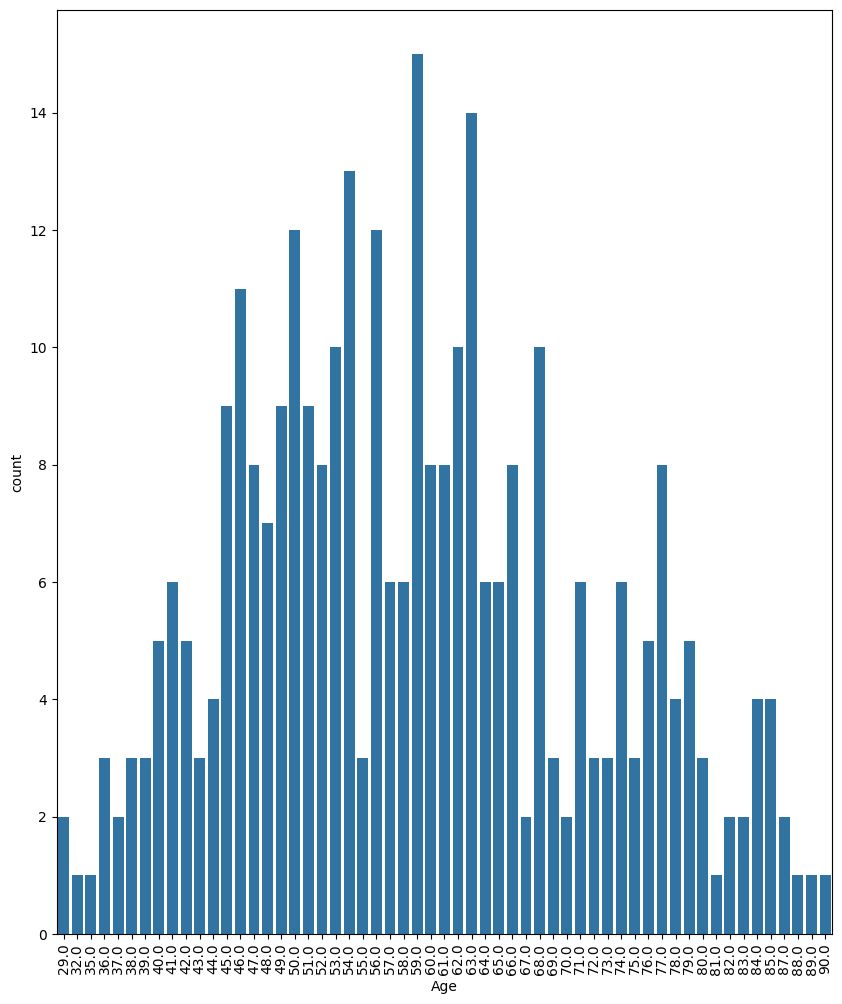

In [9]:
plt.figure(figsize=(10,12))
sns.countplot(x=df['Age'])
plt.xticks(rotation=90);

In [10]:
df['Gender'].value_counts()

,count
Gender,
FEMALE,313
MALE,4


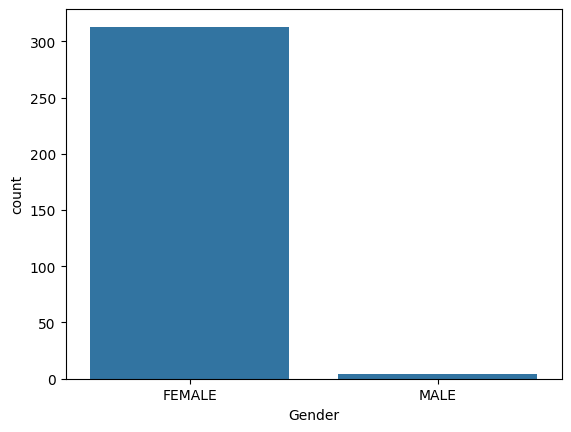

In [11]:
sns.countplot(x=df['Gender']);

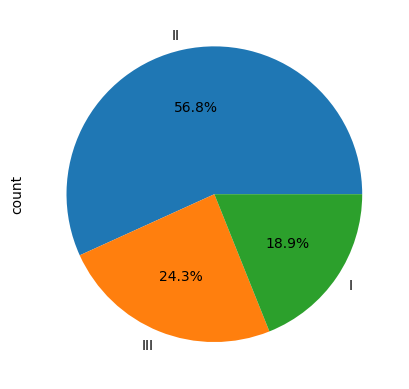

In [12]:
#sns.countplot(x=df['Tumour_Stage']);
df['Tumour_Stage'].value_counts().plot.pie(autopct='%1.1f%%');

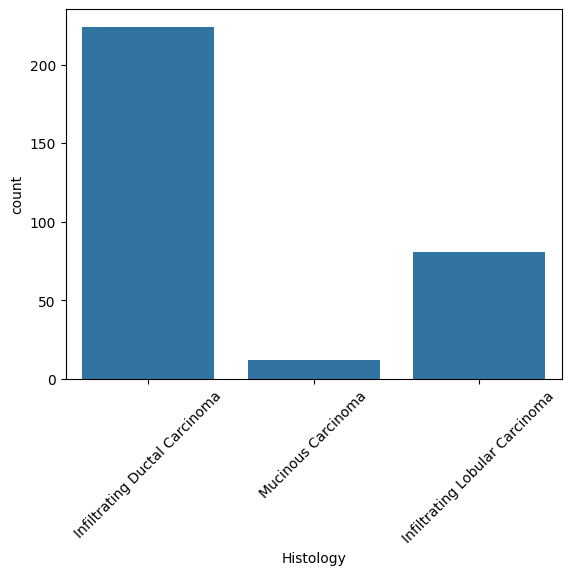

In [13]:
sns.countplot(x=df['Histology'])
plt.xticks(rotation=45);

In [14]:
df['ER status'].value_counts()

,count
ER status,
Positive,317


In [15]:
df['PR status'].value_counts()

,count
PR status,
Positive,317


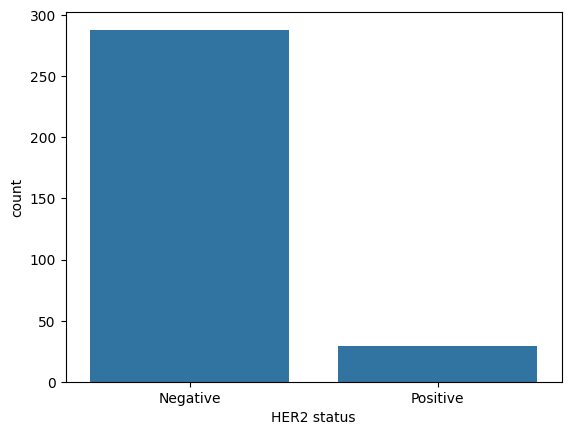

In [16]:
sns.countplot(x=df['HER2 status']);

In [17]:
df['Surgery_type'].value_counts()

,count
Surgery_type,
Other,97
Modified Radical Mastectomy,89
Lumpectomy,66
Simple Mastectomy,65


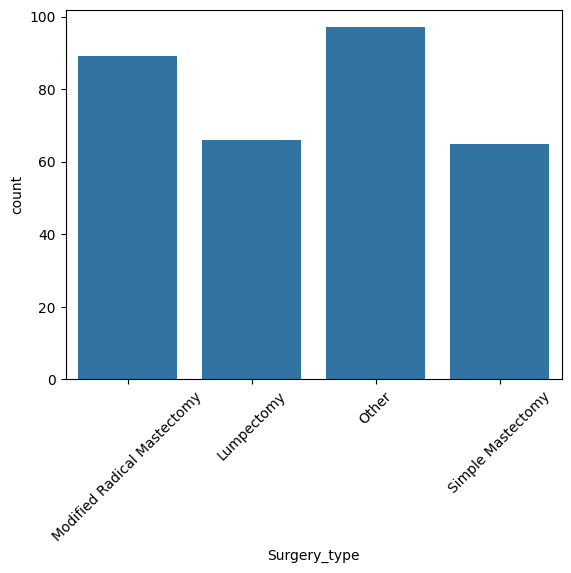

In [18]:
sns.countplot(x=df['Surgery_type'])
plt.xticks(rotation=45);

In [19]:
df['Patient_Status'].value_counts()

,count
Patient_Status,
Alive,255
Dead,62


<Axes: xlabel='Patient_Status', ylabel='count'>

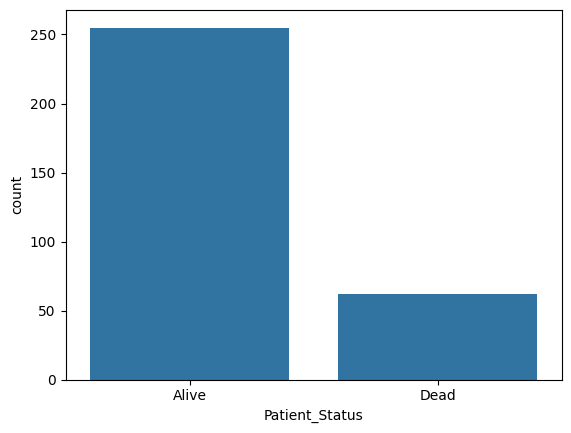

In [20]:
sns.countplot(x=df['Patient_Status'])

## Modelling

In [21]:
d={'Alive':1, 'Dead':0}
df['Patient_Status']=df['Patient_Status'].map(d)

In [22]:
x=df.drop('Patient_Status', axis=1)
y=df[['Patient_Status']]

In [23]:
x=pd.get_dummies(x, drop_first=True)

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.20, random_state=42)

### Gaussian

In [25]:
g=GaussianNB()
g.fit(x_train,y_train)
gtahmin=g.predict(x_test)
accuracy_score(gtahmin,y_test)

0.453125

In [26]:
confusion_matrix(gtahmin,y_test)

array([[ 8, 32],
       [ 3, 21]])

In [27]:
print(classification_report(gtahmin,y_test))

              precision    recall  f1-score   support

           0       0.73      0.20      0.31        40
           1       0.40      0.88      0.55        24

    accuracy                           0.45        64
   macro avg       0.56      0.54      0.43        64
weighted avg       0.60      0.45      0.40        64



### Bernoulli

In [28]:
b=BernoulliNB()
b.fit(x_train,y_train)
btahmin=b.predict(x_test)
accuracy_score(btahmin,y_test)

0.828125

In [29]:
confusion_matrix(btahmin,y_test)

array([[ 0,  0],
       [11, 53]])

<Axes: >

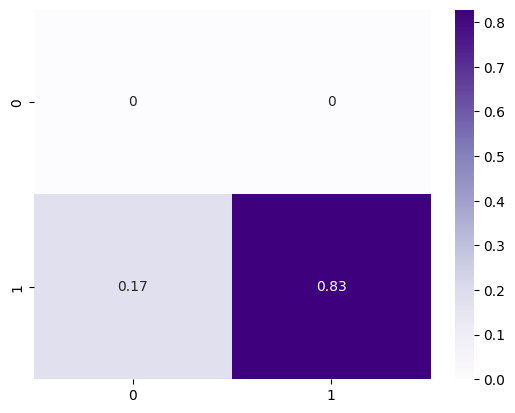

In [30]:
cm = confusion_matrix(btahmin, y_test)
normalized_cm = cm / cm.sum()
sns.heatmap(normalized_cm, annot=True, cmap='Purples')

In [31]:
print(classification_report(btahmin,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.83      0.91        64

    accuracy                           0.83        64
   macro avg       0.50      0.41      0.45        64
weighted avg       1.00      0.83      0.91        64



In [32]:
y_scores = b.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

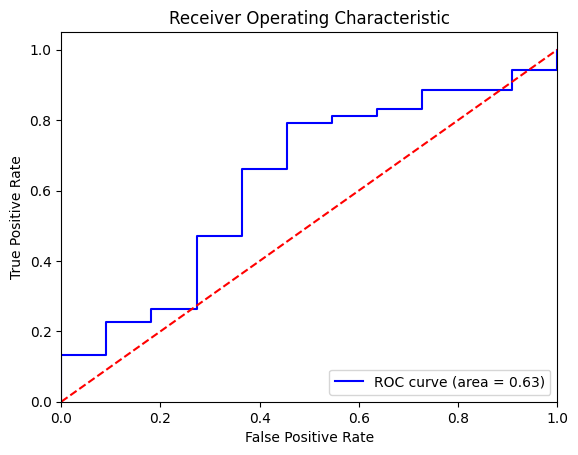

In [33]:
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Based on this ROC (Receiver Operating Characteristic) curve and AUC (Area Under Curve) graph, we can comment as follows:

1. ROC Curve:
ROC curve shows the relationship between True Positive Rate (TPR) and False Positive Rate (FPR) of the model at different classification thresholds.
The closer the ROC curve is to the red dashed diagonal line, the worse the classification performance of the model. Because this diagonal represents a completely random classification. If the ROC curve sits exactly on top, it shows that the model makes random predictions.
In this graph, the ROC curve is quite close to the red line and does not go very high, which shows that the model does not perform very well.

2. AUC (Area Under Curve):
AUC represents the area under the ROC curve and measures the overall classification success of the model.
The AUC score is given as 0.63. This shows that the classification performance of the model is low.
An AUC value of 0.63 indicates that the model is slightly better at predicting than random predictions, but still performs poorly.

3. General Comment:
Since the model's AUC score is 0.63 in this graph, the model is not very successful in classification.

In [34]:
#K-Fold Cross Validation (with Random Forest Classifier)
x=df.drop('Patient_Status', axis=1)
y=df[['Patient_Status']]
x=pd.get_dummies(x, drop_first=True)

model=RandomForestClassifier()

#K-fold cross validation (K=5)
kf=KFold(n_splits=5, shuffle=True, random_state=42)

#Calculating cross validation results
scores = cross_val_score(model, x, y, cv=kf, scoring='accuracy')

#Average of results
print(f"Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean()}")

Accuracy Scores: [0.828125   0.8125     0.80952381 0.73015873 0.84126984]
Mean Accuracy: 0.804315476190476


* K-fold Results
1. (Accuracy Scores): [0.828, 0.812, 0.809, 0.730, 0.841]
There is some variability among the accuracy scores. The lowest accuracy score is 73%, while the highest accuracy score is 84.1%. These differences indicate that the model performs better on some data segments, while the performance decreases on other data segments. In particular, a score of 73% may indicate that the model is struggling on some layers.

2. Mean Accuracy: 0.804 (i.e. 80.4%)The average accuracy of 80.4% indicates that the model has a reasonable performance overall. However, there may be a need to improve the model to achieve higher accuracy.

3. Variation:
Lowest accuracy: 73%
Highest accuracy: 84.1%
A slightly higher variation indicates that the model performs well in some data segments while struggling in others. This indicates that the model's performance is not consistent across certain subsets of the data.

4. Model Performance:
The average accuracy of 80.4% can generally be considered an "acceptable" performance, but optimizations can be made to make the model perform better.

* General Comment:
The average accuracy of the model is at a reasonable level of 80.4%, but the variation between different folds is remarkable. The fact that the model performs well in some data segments while experiencing a performance decrease in others indicates that the model needs further examination and improvement. Optimizations can be made to make the model perform more balanced and consistent.

In [35]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import  BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def algo_test(x, y):

    lr = LogisticRegression(max_iter=1000)

    b = BernoulliNB()

    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    abc = AdaBoostClassifier()
    gbc = GradientBoostingClassifier()
    svc = SVC()
    mlp = MLPClassifier(max_iter=1000)

    algos = [lr,  b,  knn, dt, rf, abc, gbc, svc, mlp]
    algo_names = ['Logistic Regression', 'BernoulliNB', 'K-Nearest Neighbors',
                  'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'SVM', 'MLP Classifier']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    accuracy = []
    precision = []
    recall = []
    f1 = []


    result = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score'], index=algo_names)

    for algo in algos:
        algo.fit(x_train, y_train)
        y_pred = algo.predict(x_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred, average='weighted'))
        recall.append(recall_score(y_test, y_pred, average='weighted'))
        f1.append(f1_score(y_test, y_pred, average='weighted'))

    result['Accuracy'] = accuracy
    result['Precision'] = precision
    result['Recall'] = recall
    result['F1-score'] = f1


    rtable = result.sort_values('Accuracy', ascending=False)
    return rtable


In [36]:
algo_test(x,y)

,Accuracy,Precision,Recall,F1-score
Logistic Regression,0.828125,0.685791,0.828125,0.750267
BernoulliNB,0.828125,0.685791,0.828125,0.750267
Random Forest,0.828125,0.685791,0.828125,0.750267
Gradient Boosting,0.828125,0.780494,0.828125,0.775355
SVM,0.828125,0.685791,0.828125,0.750267
Decision Tree,0.812500,0.785558,0.812500,0.795076
MLP Classifier,0.796875,0.804187,0.796875,0.800323
K-Nearest Neighbors,0.765625,0.713991,0.765625,0.736437
AdaBoost,0.734375,0.743690,0.734375,0.738885


## AutoML with PyCaret

In [41]:
#pip install pycaret

In [38]:
from pycaret.classification import*

In [39]:
a=setup(data=df,target="Patient_Status")

,Description,Value
0,Session id,3679
1,Target,Patient_Status
2,Target type,Binary
3,Original data shape,"(317, 16)"
4,Transformed data shape,"(317, 23)"
5,Transformed train set shape,"(221, 23)"
6,Transformed test set shape,"(96, 23)"
7,Numeric features,5
8,Categorical features,10
9,Preprocess,True


In [40]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8055,0.5311,1.0000,0.8055,0.8922,0.0000,0.0000,1.7190
dt,Decision Tree Classifier,0.8055,0.5000,1.0000,0.8055,0.8922,0.0000,0.0000,0.6450
ridge,Ridge Classifier,0.8055,0.5948,1.0000,0.8055,0.8922,0.0000,0.0000,0.2180
rf,Random Forest Classifier,0.8055,0.5910,1.0000,0.8055,0.8922,0.0000,0.0000,0.4050
ada,Ada Boost Classifier,0.8055,0.5000,1.0000,0.8055,0.8922,0.0000,0.0000,0.2210
gbc,Gradient Boosting Classifier,0.8055,0.5000,1.0000,0.8055,0.8922,0.0000,0.0000,0.2660
lda,Linear Discriminant Analysis,0.8055,0.5000,1.0000,0.8055,0.8922,0.0000,0.0000,0.1980
et,Extra Trees Classifier,0.8055,0.6348,1.0000,0.8055,0.8922,0.0000,0.0000,0.3430
lightgbm,Light Gradient Boosting Machine,0.8055,0.5000,1.0000,0.8055,0.8922,0.0000,0.0000,0.4610
dummy,Dummy Classifier,0.8055,0.5000,1.0000,0.8055,0.8922,0.0000,0.0000,0.1860


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

## Summary

This project addresses breast cancer diagnosis as a classification problem and aims to predict whether patients have cancer. The dataset includes patients' demographic information (age, gender, ethnicity), medical history, and signs and symptoms related to breast cancer. The target variable "Breast Cancer" is a binary variable indicating whether the patient has been diagnosed with cancer (cancerous/non-cancerous).

Within the scope of the project, firstly the data was cleaned and made suitable for modeling. Then, a model was created using classification algorithms such as logistic regression, decision trees, random forests. The performance of the model was evaluated with metrics such as accuracy, F1 score, precision, recall, AUC, and ROC. In addition, the results were tested with K-fold cross-validation.We did automl with pycaret We did not apply deep learning because our success rate was good and completed our project.

This study is an important step for the early diagnosis of breast cancer and aims to help healthcare professionals in their decision-making processes.